In [1]:
from dependencies import *
cpidata = pd.read_excel('cpidata.xls',sheet_name='Sheet2')

a = pd.read_stata('table2_1.dta')
b = pd.read_stata('table2_2.dta')
c = pd.read_stata('table3.dta')
d = pd.read_stata('table4.dta')

data = pd.read_stata('table2_1.dta')
data = data.merge(pd.read_stata('table2_2.dta'),on=['month','year','type_fund'])
data = data.merge(pd.read_stata('table3.dta'),on=['month','year','type_fund'])
data = data.merge(pd.read_stata('table4.dta'),on=['month','year','type_fund'])

data['month'] = ['January' if x == 'Janurary' else x for x in data['month']]
data['monthyear'] = [a+str(b) for a,b in zip(data['month'].values,data['year'].values)]
data['date'] = pd.to_datetime(data['monthyear'],infer_datetime_format=True)

data = data.merge(cpidata,on=['date'])
data = data.sort_values(['date','type_fund'])

money_vars = ['new_open_amt', 'new_closed_amt', 'new_interval_amt', 'new_assured_amt', 'exi_open_amt', 'exi_closed_amt', 'exi_interval_amt', 'exi_assured_amt', 'open_red', 'closed_red', 'interval_red', 'assured_re', 'open_aum', 'closed_aum', 'interval_aum', 'assured_aum']

data['new_open_amt'] = data['new_open_amt'].fillna(1)

In [2]:
a1 = [x and y for x,y in zip(data['date'] == 'January2008',data['type_fund'] == 2)]
a2 = [x and y for x,y in zip(data['date'] > 'January2008',data['type_fund'] == 2)]
closednumsum = np.sum(data.loc[a2]['new_closed_no'])
#print('Adding closed num sum', closednumsum)
data.loc[a1,'new_closed_no'] += closednumsum
data.loc[a2,'new_closed_no'] = 0
closedamtsum = np.sum(data.loc[a2]['new_closed_amt'])
#print('Adding closed Amount sum', closedamtsum)
data.loc[a1,'new_closed_amt'] += 4656.147
#data.loc[a1,'new_closed_amt'] += closedamtsum
data.loc[a2,'new_closed_amt'] = 0

In [3]:
for mvar in money_vars:
    data[mvar] = ((data[mvar]/data['cpi9'])*10)/(46.235)

    
data['net_exi_open_amt'] = data['new_open_amt'].values + data['exi_open_amt'].values - data['open_red'].values
data['net_exi_closed_amt'] = data['new_closed_amt'].values + data['exi_closed_amt'].values - data['closed_red'].values

In [4]:
data['equity'] = 0
data.loc[(data['type_fund'] == 2).values + (data['type_fund'] == 3).values + (data['type_fund'] == 6).values,'equity']  = 1
dataequity = data[(data['equity']==1)]

In [5]:
dataequity.describe()

,year,type_fund,new_open_no,new_open_amt,new_closed_no,new_closed_amt,new_interval_no,new_interval_amt,new_assured_no,new_assured_amt,...,interval_aum,assured_aum,inflation,cpi,cpibase9,cpi.1,cpi9,net_exi_open_amt,net_exi_closed_amt,equity
count,360.00000,360.000000,358.000000,360.000000,360.000000,360.000000,54.0,54.0,162.0,162.0,...,54.000000,162.0,333.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0
mean,2004.25000,3.666667,0.734637,68.841764,0.183333,25.324563,0.0,0.0,0.0,0.0,...,12.506511,0.0,0.053781,128.489312,0.832467,129.373574,0.778712,88.265918,15.518991,1.0
std,2.90878,1.702039,1.415986,263.833696,0.850856,171.245830,0.0,0.0,0.0,0.0,...,21.587979,0.0,0.015889,17.436772,0.112971,18.962333,0.114136,303.533716,165.128589,0.0
min,1999.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.032700,100.000000,0.647888,100.000000,0.601910,-702.554740,-489.573255,1.0
25%,2002.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.044000,114.648041,0.742791,114.648041,0.690078,-3.925752,-4.455830,1.0
50%,2004.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.054000,125.030781,0.810059,125.030781,0.752572,12.818134,-1.595324,1.0
75%,2007.00000,6.000000,1.000000,6.962086,0.000000,0.000000,0.0,0.0,0.0,0.0,...,26.819509,0.0,0.065000,146.523627,0.949309,146.523627,0.881940,75.384055,0.000000,1.0
max,2009.00000,6.000000,10.000000,2601.106823,12.000000,2878.900259,0.0,0.0,0.0,0.0,...,88.461123,0.0,0.084000,154.347714,1.000000,166.137866,1.000000,2730.089463,2710.093078,1.0


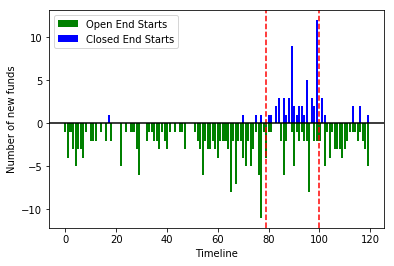

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
temp = dataequity.groupby('date').sum()[['new_open_no','new_closed_no']]
temp = temp.reset_index()
x1 = (temp['date'] == '2006-05-01').idxmax()
x2 = (temp['date'] == '2008-02-01').idxmax()
plt.bar(range(len(temp)),-temp['new_open_no'].values,color='g',linestyle='-',linewidth=2,label='Open End Starts')
plt.bar(range(len(temp)), temp['new_closed_no'].values,color='b',linestyle='-',linewidth=2,label='Closed End Starts')
plt.axvline(x=x1,color='r',linestyle='--')
plt.axvline(x=x2,color='r',linestyle='--')
plt.axhline(0,color='black',linestyle='-')
plt.legend(loc='best')
plt.xlabel('Timeline')
plt.ylabel('Number of new funds')
plt.show()

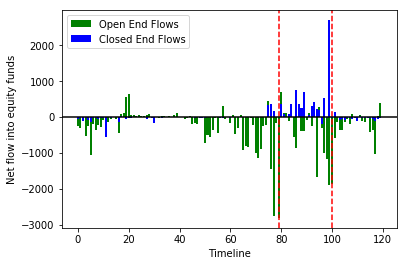

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
temp = dataequity.groupby('date').sum()[['net_exi_open_amt','net_exi_closed_amt']]
temp = temp.reset_index()
x1 = (temp['date'] == '2006-05-01').idxmax()
x2 = (temp['date'] == '2008-02-01').idxmax()
plt.bar(range(len(temp)),-temp['net_exi_open_amt'].values,color='g',linestyle='-',linewidth=2,label='Open End Flows')
plt.bar(range(len(temp)), temp['net_exi_closed_amt'].values,color='b',linestyle='-',linewidth=2,label='Closed End Flows')
plt.axvline(x=x1,color='r',linestyle='--')
plt.axvline(x=x2,color='r',linestyle='--')
plt.axhline(0,color='black',linestyle='-')
plt.legend(loc='best')
plt.xlabel('Timeline')
plt.ylabel('Net flow into equity funds')
plt.show()